# 1. Regression Datasets.

Imported the scikit libraries. created a x matrix with Uniform distribution  µ =1 and σ = 0.05.

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler
import math

#initialising dataset D1

np.random.seed(0)
#mu= 1, Stdev = 0.05
#since for uniform distribution we have mean  =1/2(a+b) and variance = ((1/12(b-a)**2)**1/2)
#solving for this equn u get low value as 0.91 and high = 1.09
x=np.random.uniform(low=0.91, high=1.09, size=100).reshape((100,1))
#normalized the data using scikit library
normalize_x = MinMaxScaler().fit_transform(x)
#rounding up to three decimal points
normalize_x = np.around(normalize_x, decimals=3)
print(normalize_x)



[[ 0.553]
 [ 0.722]
 [ 0.608]
 [ 0.549]
 [ 0.426]
 [ 0.652]
 [ 0.44 ]
 [ 0.902]
 [ 0.975]
 [ 0.385]
 [ 0.8  ]
 [ 0.533]
 [ 0.573]
 [ 0.936]
 [ 0.067]
 [ 0.084]
 [ 0.016]
 [ 0.842]
 [ 0.786]
 [ 0.88 ]
 [ 0.99 ]
 [ 0.808]
 [ 0.464]
 [ 0.789]
 [ 0.115]
 [ 0.646]
 [ 0.141]
 [ 0.956]
 [ 0.526]
 [ 0.417]
 [ 0.264]
 [ 0.782]
 [ 0.459]
 [ 0.573]
 [ 0.014]
 [ 0.623]
 [ 0.617]
 [ 0.622]
 [ 0.955]
 [ 0.688]
 [ 0.361]
 [ 0.44 ]
 [ 0.704]
 [ 0.056]
 [ 0.673]
 [ 0.677]
 [ 0.209]
 [ 0.126]
 [ 0.316]
 [ 0.365]
 [ 0.575]
 [ 0.441]
 [ 1.   ]
 [ 0.099]
 [ 0.208]
 [ 0.159]
 [ 0.659]
 [ 0.253]
 [ 0.469]
 [ 0.244]
 [ 0.157]
 [ 0.107]
 [ 0.662]
 [ 0.136]
 [ 0.195]
 [ 0.37 ]
 [ 0.83 ]
 [ 0.094]
 [ 0.847]
 [ 0.093]
 [ 0.988]
 [ 0.472]
 [ 0.988]
 [ 0.61 ]
 [ 0.747]
 [ 0.035]
 [ 0.283]
 [ 0.117]
 [ 0.296]
 [ 0.116]
 [ 0.318]
 [ 0.416]
 [ 0.06 ]
 [ 0.699]
 [ 0.571]
 [ 0.265]
 [ 0.527]
 [ 0.091]
 [ 0.581]
 [ 0.94 ]
 [ 0.319]
 [ 0.674]
 [ 0.129]
 [ 0.723]
 [ 0.289]
 [ 0.181]
 [ 0.591]
 [ 0.016]
 [ 0.838]
 [ 0.   ]]

Loading a dataset D2 of red wine dataset

In [53]:

D2 = pd.read_table("C:\Users\saikiran\Desktop\winequality-red.csv", delimiter=";")
print(D2)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
5               7.4             0.660         0.00             1.8      0.075   
6               7.9             0.600         0.06             1.6      0.069   
7               7.3             0.650         0.00             1.2      0.065   
8               7.8             0.580         0.02             2.0      0.073   
9               7.5             0.500         0.36             6.1      0.071   
10              6.7             0.580         0.08             1.8      0.097   
11              7.5         

# Exercise 1 :  GeneralizedLinearModelswithScikitLearn

Dividing the datasets to X and Y dataframes

In [54]:
Xwine = D2.iloc[:, :11]
Ywine = D2.iloc[:, -1:]
print(Xwine.head())
print(Ywine.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4  
   quali

Splitting the dataframes to training and test datasets

In [55]:
#splitting the dataset to training and testing
np.random.seed(0)
msk = np.random.rand(len(Xwine)) < 0.8
X_train = Xwine[msk].values
X_test = Xwine[~msk].values
Y_train = Ywine[msk].values.reshape((1260))
Y_test = Ywine[~msk].values.reshape(339)
print((X_train.shape))
print((X_test.shape))
print(Y_train.shape)
print(Y_test.shape)

(1260L, 11L)
(339L, 11L)
(1260L,)
(339L,)


Learning Models using Stochastic Gradient Descent OLS.

Defined a SGD regressor from scikit library for ordinary Least squares 

In [56]:
def SGD_Regressor_OLS(X_train,X_test,Y_train,Y_test,alpha,rmse_train_sgd,rmse_test_sgd,alpha_new):
    # run the classifier
    sgd = SGDRegressor(penalty="none",eta0=alpha)
    sgd.fit(X_train, Y_train)
    y_train_sgd = sgd.predict(X_train)
    y_test_sgd = sgd.predict(X_test)
    mss_train_sgd = mean_squared_error(Y_train, y_train_sgd)
    rmse_train_sgd = np.append(rmse_train_sgd,np.sqrt(mss_train_sgd))
    mss_test_sgd = mean_squared_error(Y_test, y_test_sgd)
    rmse_test_sgd = np.append(rmse_test_sgd,np.sqrt(mss_test_sgd))
    alpha_new=np.append(alpha_new,alpha)
    
    # and plot the result
    
    
    return alpha_new,rmse_train_sgd,rmse_test_sgd





Training my Ordinary Least Squares model with 3 different learning parameters and plotted the graph of rmse Train and test with respect to learning parameter alpha values and found that my Rmse value is less when my alpha value is less. 

[  5.08571962e+00   1.73256966e+14   1.71589843e+14]
[  5.14837747e+00   1.70681399e+14   1.64974278e+14]


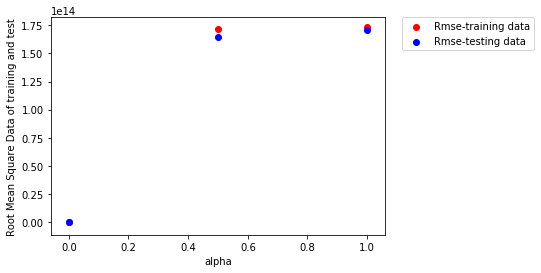

In [57]:
alpha_ols = [0.00000005,1,0.5]
rmse_train=[]
rmse_test=[]
alpha_new =[]
for a in alpha_ols:
    alpha_new,rmse_train,rmse_test = SGD_Regressor_OLS(X_train,X_test,Y_train,Y_test,a,rmse_train,rmse_test,alpha_new)
print(rmse_train)
print(rmse_test)
plt.scatter( alpha_new, rmse_train, color='red', label = "Rmse-training data")
plt.scatter(alpha_new, rmse_test, color='blue', label = "Rmse-testing data")
plt.xlabel("alpha")
plt.ylabel("Root Mean Square Data of training and test")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


Learning Models using Stochastic Gradient Descent Ridge.

Implemented SGDregresssor from scikit library for ridge model and assigned my penalty to l2. and trained my model with different learning parameters alpha and different hyper parameters lamda. and found that my ridge regularized model performing better than my non-regularized model

In [58]:
def SGD_Regressor_Ridge(X_train,X_test,Y_train,Y_test,alpha_param,lamda,rmse_train_sgd,rmse_test_sgd,alpha_new,lamda_new):
    # run the classifier
    sgd = SGDRegressor(penalty='l2',alpha=lamda,eta0=alpha_param)
    sgd.fit(X_train, Y_train)
    y_train_sgd = sgd.predict(X_train)
    y_test_sgd = sgd.predict(X_test)
    mss_train_sgd = mean_squared_error(Y_train, y_train_sgd)
    rmse_train_sgd.append(np.sqrt(mss_train_sgd))
    mss_test_sgd = mean_squared_error(Y_test, y_test_sgd)
    rmse_test_sgd.append(np.sqrt(mss_test_sgd))
    alpha_new.append(alpha_param)
    lamda_new.append(lamda)
   
    
    
    return alpha_new,lamda_new,rmse_train_sgd,rmse_test_sgd





[101093253965303.62, 113235303136064.77, 29410286296170.059, 82369923108781.031, 273367667463621.19, 555178419509688.12, 287394483702571.31, 22460416734454.906, 125705531713796.37]
[97915108754580.781, 111106636020523.75, 27545437898068.23, 80733706962346.594, 267365814971502.22, 540459199191904.94, 278308667882224.72, 21060035216798.137, 123352776157626.14]


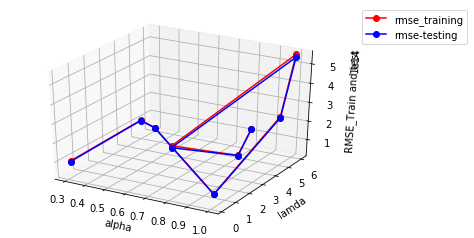

In [59]:
alpha_ridge = [0.3,1,0.8]
lamda_ridge = [0.2,5,6]
rmse_train=[]
rmse_test=[]
lamda_new = []
alpha_new =[]
for a in alpha_ridge:
    for l in lamda_ridge:
        alpha_new,lamda_new,rmse_train,rmse_test = SGD_Regressor_Ridge(X_train,X_test,Y_train,Y_test,a,l,rmse_train,rmse_test,alpha_new,lamda_new)
print(rmse_train)
print(rmse_test)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(alpha_new,lamda_new ,rmse_train ,c='r', marker='o',label = "rmse_training")
ax.plot(alpha_new,lamda_new ,rmse_test ,c='b', marker='o', label = "rmse-testing")
ax.set_xlabel('alpha')
ax.set_ylabel('lamda')
ax.set_zlabel('RMSE_Train and test')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#alpha_SGD_2 = SGD_Regressor(X_train,X_test,Y_train,Y_test)
#alpha_SGD_3 = SGD_Regressor(X_train,X_test,Y_train,Y_test)

Learning Models using Stochastic Gradient Descent Ridge.

Implemented SGDregresssor from scikit library for ridge model and assigned my penalty to l1. and trained my model with different learning parameters alpha and different hyper parameters lamda. and found that my lasso regularized model performing better than my non-regularized model

In [60]:
def SGD_Regressor_lasso(X_train,X_test,Y_train,Y_test,alpha_param,lamda,rmse_train_sgd,rmse_test_sgd,alpha_new,lamda_new):
    # run the classifier
    sgd = SGDRegressor(penalty='l1',alpha=lamda,eta0=alpha_param)
    sgd.fit(X_train, Y_train)
    y_train_sgd = sgd.predict(X_train)
    y_test_sgd = sgd.predict(X_test)
    mss_train_sgd = mean_squared_error(Y_train, y_train_sgd)
    rmse_train_sgd = np.append(rmse_train_sgd,np.sqrt(mss_train_sgd))
    mss_test_sgd = mean_squared_error(Y_test, y_test_sgd)
    rmse_test_sgd = np.append(rmse_test_sgd,np.sqrt(mss_test_sgd))
    alpha_new=np.append(alpha_new,alpha_param)
    lamda_new = np.append(lamda_new,lamda)
   
    
    
    return alpha_new,lamda_new,rmse_train_sgd,rmse_test_sgd





[  1.49899757e+14   5.25687398e+13   4.77531299e+13   3.91762067e+14
   1.77523167e+14   6.49711433e+14   1.97765698e+14   2.38189747e+14
   1.43830413e+14]
[  1.47758011e+14   4.94822794e+13   4.58418628e+13   3.81765114e+14
   1.65360494e+14   6.35642377e+14   1.88315075e+14   2.27574303e+14
   1.35383622e+14]


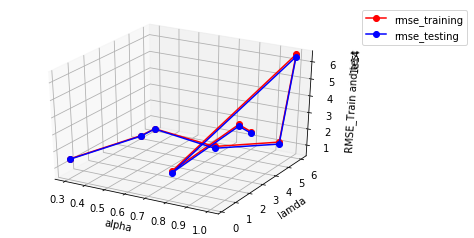

In [61]:
alpha_lasso = [0.3,1,0.8]
lamda_lasso = [0.2,5,6]
rmse_train=[]
rmse_test=[]
alpha_new =[]
lamda_new=[]
for a in alpha_lasso:
    for l in lamda_lasso:
        alpha_new,lamda_new,rmse_train,rmse_test = SGD_Regressor_lasso(X_train,X_test,Y_train,Y_test,a,l,rmse_train,rmse_test,alpha_new,lamda_new)
print(rmse_train)
print(rmse_test)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(alpha_new,lamda_new ,rmse_train ,c='r', marker='o',label="rmse_training")
ax.plot(alpha_new,lamda_new ,rmse_test ,c='b', marker='o',label="rmse_testing")
ax.set_xlabel('alpha')
ax.set_ylabel('lamda')
ax.set_zlabel('RMSE_Train and test')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
#alpha_SGD_2 = SGD_Regressor(X_train,X_test,Y_train,Y_test)
#alpha_SGD_3 = SGD_Regressor(X_train,X_test,Y_train,Y_test)

MY Regularized Model is performing better to non-regularized model

Grid_Search for the hyperparameter tuning for OLS

Perform the Grid_Search for the hyperparameter tuning for ordinary Least square model and found my best estimator to be 0.3

In [62]:

parameter_ols = {'eta0': [0.3,1,0.8]}
sgd = SGDRegressor()
clf = GridSearchCV(sgd, parameter_ols, cv = 3)
clf.fit(X_train,Y_train)
alpha_ols = clf.best_estimator_.eta0
print(alpha_ols)



0.3


plotted my grid search of OLS model based on the mean_test_score

[ -2.86714793e+27  -2.53276926e+29  -1.07700545e+29]


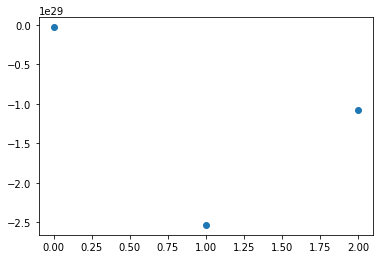

In [63]:
best_ols = clf.cv_results_['mean_test_score']
print(best_ols)
plt.plot(best_ols,'o')
plt.show()

Grid_Search for the hyperparameter tuning for Ridge

Perform the Grid_Search for the hyperparameter tuning for Ridge model and found my best estimator of learning parameter to be 0.3 and hyper parameter lamda to be 6

In [64]:
parameter_ridge = {'penalty':['l2'],'eta0': [0.3,1,0.8],'alpha':[0.2,5,6]}
sgd = SGDRegressor()
clf = GridSearchCV(sgd, parameter_ridge, cv = 3)
clf.fit(X_train,Y_train)
print clf.best_estimator_.eta0
print clf.best_estimator_.alpha



0.3
6


plotted my grid search of ridge model based on the mean_test_score

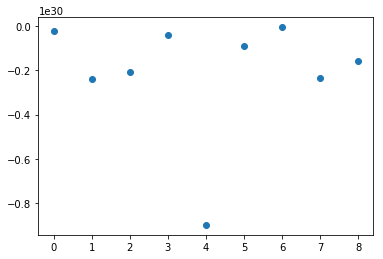

In [65]:
best_ridge = clf.cv_results_['mean_test_score']
plt.plot(best_ridge,'o')
plt.show()

Grid_Search for the hyperparameter tuning for lasso

Perform the Grid_Search for the hyperparameter tuning for lasso model and found my best estimator of learning parameter to be 0.3 and hyper parameter lamda to be 5

In [77]:
parameter_lasso = {'penalty':['l1'],'eta0': [0.3,1,0.8],'alpha':[0.2,5,6]}
sgd = SGDRegressor()
clf = GridSearchCV(sgd, parameter_lasso, cv = 3)
clf.fit(X_train,Y_train)
print clf.best_estimator_.eta0
print clf.best_estimator_.alpha


0.3
5


plotted my grid search of ridge model based on the mean_test_score

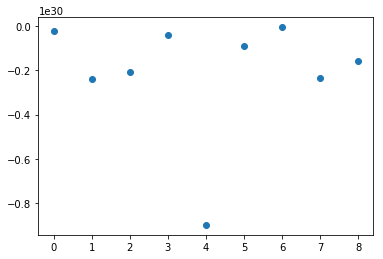

In [67]:
best_lasso = clf.cv_results_['mean_test_score']
plt.plot(best_ridge,'o')
plt.show()

Box plot for the optimal hyper parameters using cross_val_score for Ols

[ -8.95135096e+27  -2.65128661e+27  -1.06460190e+28]


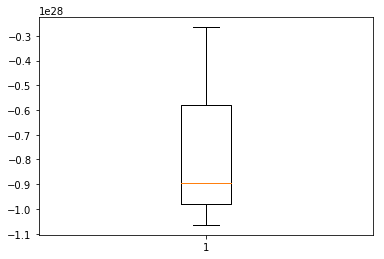

In [68]:
sgd = SGDRegressor()
clf = GridSearchCV(sgd, parameter_ols, cv = 3)
clf.fit(X_train,Y_train)
score_ols= cross_val_score(clf.best_estimator_, X_train,Y_train)
print(score_ols)
plt.boxplot(score_ols)
plt.show()

[ -5.55326498e+27  -2.43328948e+28  -6.87382688e+26]


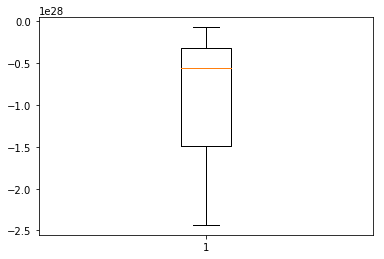

In [69]:
sgd = SGDRegressor()
clf = GridSearchCV(sgd, parameter_ridge, cv = 3)
clf.fit(X_train,Y_train)
score_ols= cross_val_score(clf.best_estimator_, X_train,Y_train)
print(score_ols)
plt.boxplot(score_ols)
plt.show()

[ -1.06194851e+28  -5.52904880e+28  -1.66252378e+28]


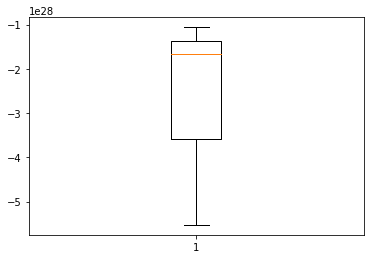

In [70]:
sgd = SGDRegressor()
clf = GridSearchCV(sgd, parameter_lasso, cv = 3)
clf.fit(X_train,Y_train)
score_ols= cross_val_score(clf.best_estimator_, X_train,Y_train)
print(score_ols)
plt.boxplot(score_ols)
plt.show()

Created a y matrix for  y = 1.3x2 + 4.8x + 8 + ξ, 

In [71]:
epsilon = 1.05 
y = 1.3 * (x**2) + 4.8 * x + 8 + epsilon
#Rounding up to three decimal points.
y = np.around(y, decimals=3)
print(y)

[[ 15.215]
 [ 15.439]
 [ 15.287]
 [ 15.21 ]
 [ 15.049]
 [ 15.345]
 [ 15.067]
 [ 15.678]
 [ 15.777]
 [ 14.995]
 [ 15.542]
 [ 15.189]
 [ 15.241]
 [ 15.725]
 [ 14.586]
 [ 14.607]
 [ 14.521]
 [ 15.598]
 [ 15.524]
 [ 15.649]
 [ 15.797]
 [ 15.552]
 [ 15.099]
 [ 15.527]
 [ 14.648]
 [ 15.337]
 [ 14.68 ]
 [ 15.751]
 [ 15.179]
 [ 15.037]
 [ 14.839]
 [ 15.518]
 [ 15.092]
 [ 15.241]
 [ 14.519]
 [ 15.307]
 [ 15.3  ]
 [ 15.306]
 [ 15.749]
 [ 15.394]
 [ 14.964]
 [ 15.066]
 [ 15.415]
 [ 14.572]
 [ 15.373]
 [ 15.379]
 [ 14.768]
 [ 14.662]
 [ 14.906]
 [ 14.969]
 [ 15.244]
 [ 15.068]
 [ 15.811]
 [ 14.627]
 [ 14.766]
 [ 14.704]
 [ 15.355]
 [ 14.824]
 [ 15.105]
 [ 14.812]
 [ 14.701]
 [ 14.637]
 [ 15.359]
 [ 14.674]
 [ 14.75 ]
 [ 14.976]
 [ 15.582]
 [ 14.62 ]
 [ 15.605]
 [ 14.619]
 [ 15.794]
 [ 15.108]
 [ 15.795]
 [ 15.29 ]
 [ 15.471]
 [ 14.545]
 [ 14.863]
 [ 14.65 ]
 [ 14.88 ]
 [ 14.648]
 [ 14.909]
 [ 15.036]
 [ 14.577]
 [ 15.408]
 [ 15.239]
 [ 14.84 ]
 [ 15.181]
 [ 14.616]
 [ 15.251]
 [ 15.73 ]
 [ 14.91 ]

# Exerice 2: Polynomial Regression

Using more degrees of polynomial feature for your data i.e. degrees 1, 2, 7, 10, 16 and 100.

In [72]:
# Preprocessing polynimial degrees
poly2 = PolynomialFeatures(2)
second_degree = poly2.fit_transform(normalize_x)
print(second_degree.shape)
poly7 = PolynomialFeatures(7)
seven_degree = poly7.fit_transform(normalize_x)
print(seven_degree.shape)
poly10 = PolynomialFeatures(10)
ten_degree = poly10.fit_transform(normalize_x)
print(ten_degree.shape)
poly16 = PolynomialFeatures(16)
sixteen_degree = poly16.fit_transform(normalize_x)
print(sixteen_degree.shape)
poly100 = PolynomialFeatures(100)
hundred_degree = poly100.fit_transform(normalize_x)
print(hundred_degree.shape)


(100L, 3L)
(100L, 8L)
(100L, 11L)
(100L, 17L)
(100L, 101L)


In [73]:
def linear_regression(X,Y):
    reg = linear_model.LinearRegression()
    reg.fit(X, Y)
    Y_predicted= reg.predict(X)
    mss = mean_squared_error(Y,Y_predicted)
    rmse = np.sqrt(mss)
    print "mss =", np.mean(mss) ,"and rmse_train=", np.sqrt(np.mean(mss))
    return Y_predicted
    
    
   
    


mss = 1.0403958024e-05 and rmse_train= 0.00322551670651


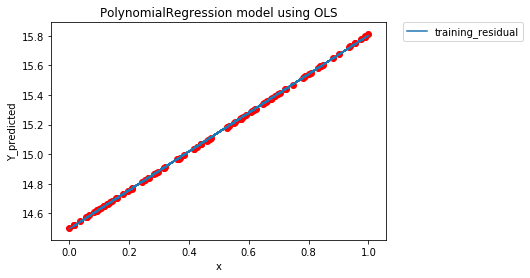

mss = 1.91995766137e-07 and rmse_train= 0.000438173214765


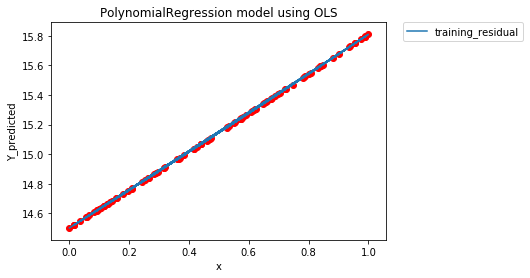

mss = 1.85717467397e-07 and rmse_train= 0.000430949495181


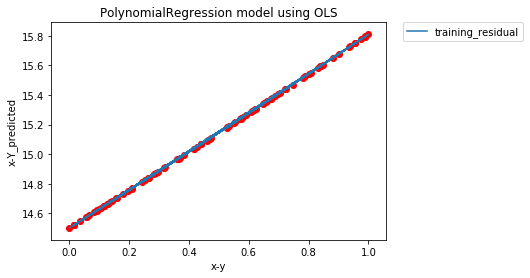

mss = 1.82620566906e-07 and rmse_train= 0.000427341276857


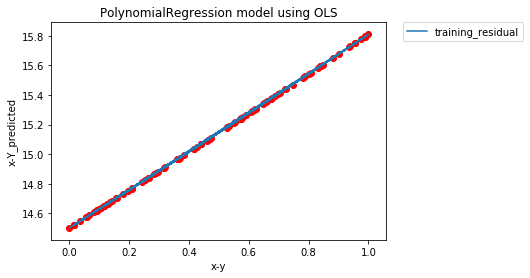

mss = 1.73071663193e-07 and rmse_train= 0.000416018825527


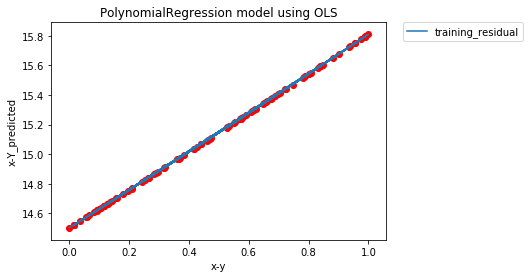

mss = 1.46859731227e-07 and rmse_train= 0.000383222821903


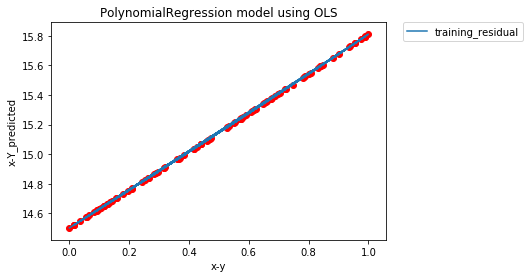

In [80]:
one_degree_polynomial = linear_regression(normalize_x,y)
plt.scatter(normalize_x,y,c='r')
plt.plot(normalize_x, one_degree_polynomial, label = "training_residual")
plt.title("PolynomialRegression model using OLS")
    #Label the X and Y axes
plt.xlabel("x")
plt.ylabel("Y_predicted")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
second_degree_polynomial = linear_regression(second_degree,y)
plt.scatter(normalize_x,y,c='r')
plt.plot(normalize_x, second_degree_polynomial, label = "training_residual")
plt.title("PolynomialRegression model using OLS")
    #Label the X and Y axes
plt.xlabel("x")
plt.ylabel("Y_predicted")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
seven_degree_polynomial = linear_regression(seven_degree,y)
plt.scatter(normalize_x,y,c='r')
plt.plot(normalize_x, seven_degree_polynomial, label = "training_residual")
plt.title("PolynomialRegression model using OLS")
    #Label the X and Y axes
plt.xlabel("x-y")
plt.ylabel("x-Y_predicted")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
ten_degree_polynomial = linear_regression(ten_degree,y)
plt.scatter(normalize_x,y,c='r')
plt.plot(normalize_x, ten_degree_polynomial, label = "training_residual")
plt.title("PolynomialRegression model using OLS")
    #Label the X and Y axes
plt.xlabel("x-y")
plt.ylabel("x-Y_predicted")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
sixteen_degree_polynomial = linear_regression(sixteen_degree,y)
plt.scatter(normalize_x,y,c='r')
plt.plot(normalize_x, sixteen_degree_polynomial, label = "training_residual")
plt.title("PolynomialRegression model using OLS")
    #Label the X and Y axes
plt.xlabel("x-y")
plt.ylabel("x-Y_predicted")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

hundred_degree_polynomial = linear_regression(hundred_degree,y)
plt.scatter(normalize_x,y,c='r')
plt.plot(normalize_x, hundred_degree_polynomial, label = "training_residual")
plt.title("PolynomialRegression model using OLS")
    #Label the X and Y axes
plt.xlabel("x-y")
plt.ylabel("x-Y_predicted")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()





From the above graphs aobeservation, My x axis a scattered values of normalised x and y values and Y axis is a predicted line with respect to my normalised x. I found my Rmse values are decreasing as my polynomial features are increasing which makes 100 degree polynomial feature of data to make a better fit.

Effect of Regularization on my polynomial data of degree 10. for different lamda values  0,1e−6,1e−2,1

In [75]:
#polynomial ridge regresssion

def Poly_ridge_regression(X,Y,alpha):
    ridge = Ridge(fit_intercept=True, alpha=alpha)
# Train the model using the training set
    ridge.fit(X,Y)
    y_prediction_ridge = ridge.predict(X)
    
    mss_poly_ridge = mean_squared_error(Y, y_prediction_ridge)
    rmse_poly_ridge = np.sqrt(mss_poly_ridge)
    print "for alpha =", alpha
    print "mss_train =", mss_poly_ridge ,"and rmse_train=", rmse_poly_ridge
    return y_prediction_ridge

for alpha = 0
mss_train = 1.82620566908e-07 and rmse_train= 0.00042734127686


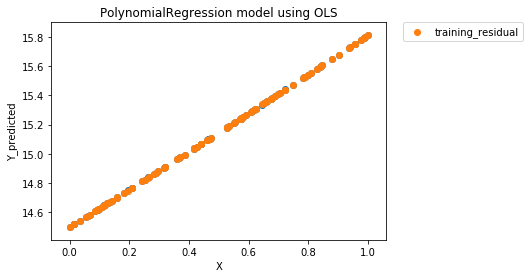

for alpha = 1e-06
mss_train = 1.86260133896e-07 and rmse_train= 0.000431578653198


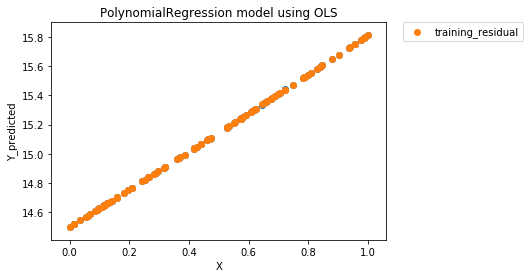

for alpha = 0.01
mss_train = 5.94476706056e-06 and rmse_train= 0.00243818929957


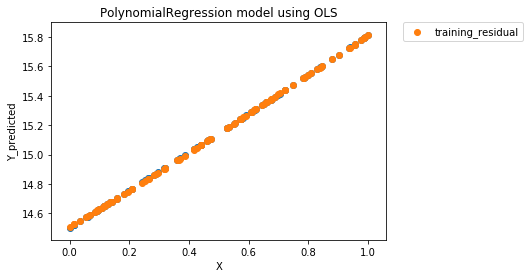

for alpha = 1
mss_train = 0.00197969857097 and rmse_train= 0.0444938037369


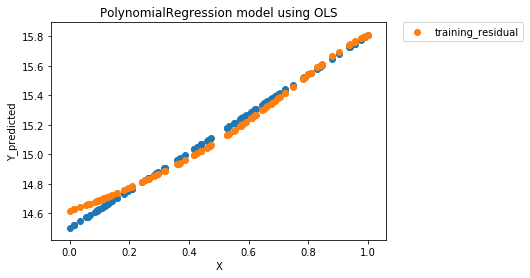

In [76]:
alpha_poly_1 = Poly_ridge_regression(ten_degree,y,0)
plt.scatter(normalize_x,y)
plt.scatter(normalize_x,alpha_poly_1, label = "training_residual")
plt.title("PolynomialRegression model using OLS")
    #Label the X and Y axes
plt.xlabel("X-Y")
plt.ylabel("X-Y_predicted")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
alpha_poly_2 = Poly_ridge_regression(ten_degree,y,0.000001)
plt.scatter(normalize_x,y)
plt.scatter(normalize_x,alpha_poly_2, label = "training_residual")
plt.title("PolynomialRegression model using OLS")
    #Label the X and Y axes
plt.xlabel("X")
plt.ylabel("Y_predicted")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
alpha_poly_3 = Poly_ridge_regression(ten_degree,y,0.01)
plt.scatter(normalize_x,y)
plt.scatter(normalize_x,alpha_poly_3, label = "training_residual")
plt.title("PolynomialRegression model using OLS")
    #Label the X and Y axes
plt.xlabel("X-Y")
plt.ylabel("X-Y_predicted")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
alpha_poly_4 = Poly_ridge_regression(ten_degree,y,1)
plt.scatter(normalize_x,y)
plt.scatter(normalize_x,alpha_poly_4, label = "training_residual")
plt.title("PolynomialRegression model using OLS")
    #Label the X and Y axes
plt.xlabel("X-Y")
plt.ylabel("X-Y_predicted")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()



for my hyperparameter lamda = 0 and 1e-06 and 0.01  my model was well fitting and for lamda = 1 my model was over fitting.